<a href="https://colab.research.google.com/github/Fernanfds/Fernanfds/blob/main/ndice_Sharpe%2C_Beta%2C_CAGR%2C_Volatilidade_Anual_e_Drawdown_Carteira_Acoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install yfinance --upgrade--no-cahe-dir
import yfinance as yf
import pandas_datareader.data as web
yf.pdr_override()


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --upgrade--no-cahe-dir


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install pyfolio
import pyfolio as pf
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [7]:
tickers = ["ABEV3.SA", "VALE3.SA", "USIM5.SA", "PETR4.SA", "^BVSP"]
dados_yahoo = web.get_data_yahoo(tickers, period="5y")["Adj Close"]

[*********************100%%**********************]  5 of 5 completed


In [8]:
dados_yahoo

Ticker,ABEV3.SA,PETR4.SA,USIM5.SA,VALE3.SA,^BVSP
Date,,,,,
2019-03-27,13.577612,10.397151,7.786451,32.385036,91903.000000
2019-03-28,13.749998,10.670960,7.942347,32.189159,94389.000000
2019-03-29,13.815669,10.670960,8.237720,33.253429,95415.000000
2019-04-01,13.807461,10.648144,8.385408,34.343811,96054.000000
2019-04-02,13.766418,10.758426,7.958754,33.710480,95387.000000
...,...,...,...,...,...
2024-03-21,12.610000,35.700001,10.330000,61.660000,128159.000000
2024-03-22,12.410000,36.049999,10.150000,60.950001,127027.000000
2024-03-25,12.230000,36.599998,9.970000,60.820000,126931.000000


In [9]:
retorno = dados_yahoo.pct_change()
retorno

Ticker,ABEV3.SA,PETR4.SA,USIM5.SA,VALE3.SA,^BVSP
Date,,,,,
2019-03-27,NaN,NaN,NaN,NaN,NaN
2019-03-28,0.012696,0.026335,0.020021,-0.006048,0.027050
2019-03-29,0.004776,0.000000,0.037190,0.033063,0.010870
2019-04-01,-0.000594,-0.002138,0.017928,0.032790,0.006697
2019-04-02,-0.002973,0.010357,-0.050881,-0.018441,-0.006944
...,...,...,...,...,...
2024-03-21,0.005582,-0.027248,-0.004817,-0.002427,-0.007481
2024-03-22,-0.015860,0.009804,-0.017425,-0.011515,-0.008833
2024-03-25,-0.014504,0.015257,-0.017734,-0.002133,-0.000756


In [10]:
retorno_acumulado = (1+ retorno).cumprod()
retorno_acumulado.iloc[0] = 1
retorno_acumulado

Ticker,ABEV3.SA,PETR4.SA,USIM5.SA,VALE3.SA,^BVSP
Date,,,,,
2019-03-27,1.000000,1.000000,1.000000,1.000000,1.000000
2019-03-28,1.012696,1.026335,1.020021,0.993952,1.027050
2019-03-29,1.017533,1.026335,1.057956,1.026815,1.038214
2019-04-01,1.016929,1.024141,1.076923,1.060484,1.045167
2019-04-02,1.013906,1.034747,1.022129,1.040928,1.037910
...,...,...,...,...,...
2024-03-21,0.928735,3.433633,1.326663,1.903966,1.394503
2024-03-22,0.914005,3.467296,1.303546,1.882042,1.382186
2024-03-25,0.900747,3.520195,1.280429,1.878028,1.381141


In [11]:
carteira = 10000 * retorno_acumulado.iloc[:, :5]
carteira["saldo"] = carteira.sum(axis=1)
carteira["retorno"] = carteira["saldo"].pct_change()
retorno

Ticker,ABEV3.SA,PETR4.SA,USIM5.SA,VALE3.SA,^BVSP
Date,,,,,
2019-03-27,NaN,NaN,NaN,NaN,NaN
2019-03-28,0.012696,0.026335,0.020021,-0.006048,0.027050
2019-03-29,0.004776,0.000000,0.037190,0.033063,0.010870
2019-04-01,-0.000594,-0.002138,0.017928,0.032790,0.006697
2019-04-02,-0.002973,0.010357,-0.050881,-0.018441,-0.006944
...,...,...,...,...,...
2024-03-21,0.005582,-0.027248,-0.004817,-0.002427,-0.007481
2024-03-22,-0.015860,0.009804,-0.017425,-0.011515,-0.008833
2024-03-25,-0.014504,0.015257,-0.017734,-0.002133,-0.000756


In [ ]:
!pip install git+https://github.com/quantopian/pyfolio

Start date,2019-03-27
End date,2024-03-27
Total months,59
,Backtest
Annual return,12.6%
Cumulative returns,79.648%
Annual volatility,29.708%
Sharpe ratio,0.55
Calmar ratio,0.25
Stability,0.65
Max drawdown,-50.065%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,50.07,2020-01-23,2020-03-23,2020-11-24,219
1,26.82,2021-05-11,2021-11-18,2023-11-14,656
2,13.85,2019-07-10,2019-08-26,2019-12-06,108
3,13.36,2021-01-08,2021-01-29,2021-04-12,67
4,11.25,2019-04-08,2019-05-16,2019-07-04,64


Stress Events,mean,min,max
New Normal,0.06%,-15.38%,16.28%


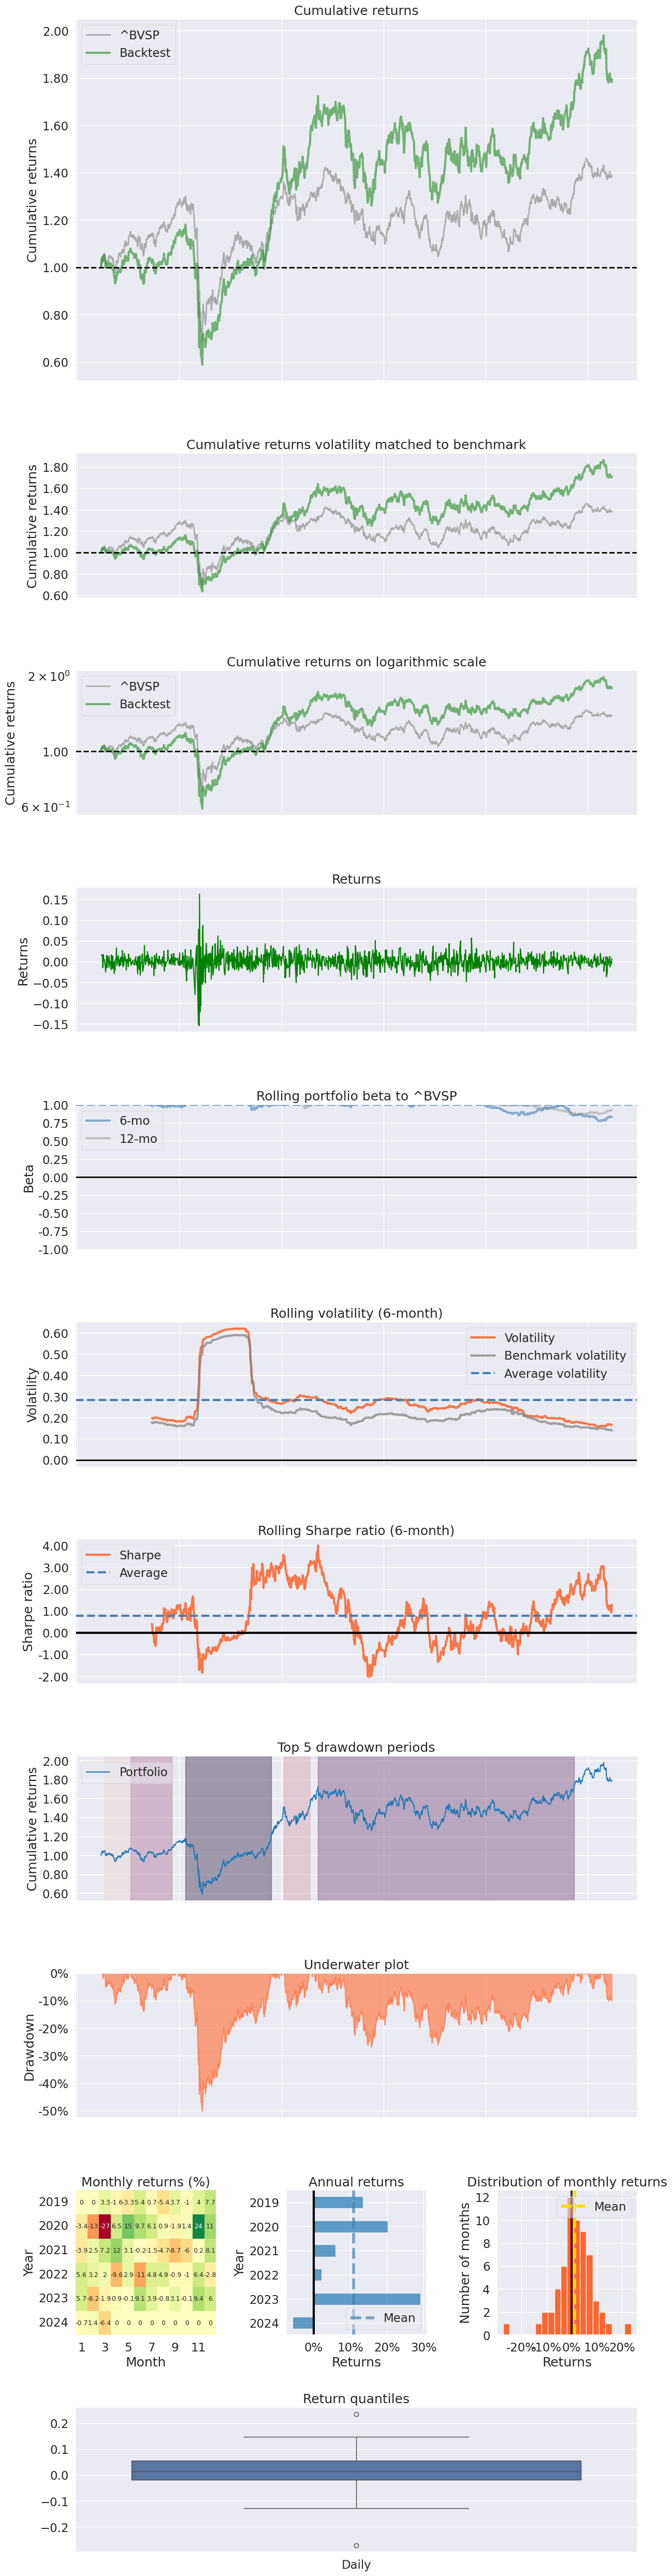

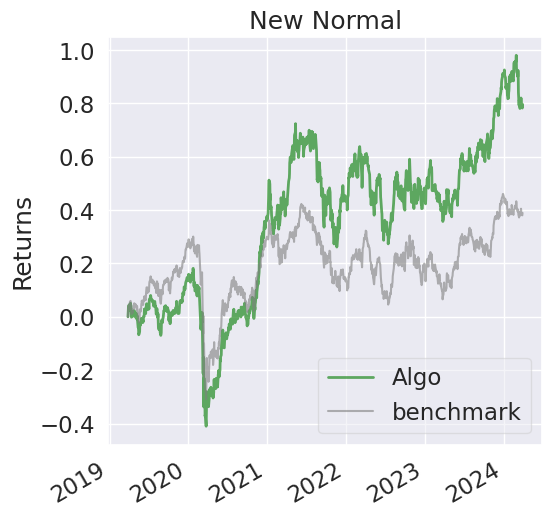

In [13]:
pf.create_full_tear_sheet(carteira["retorno"], benchmark_rets=retorno["^BVSP"])